In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.random.set_seed(777)

In [2]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [3]:
xy=pd.read_csv('winequality-red.csv')
xy.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
xy.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# xy.drop(xy.columns[[2,4,5,6,7,8,9]], axis='columns')
# xy.head(10)

In [6]:
Y_value = xy['quality'].unique()
xy = xy.sample(frac=1,random_state = 777)
for i in range(len(Y_value)):
    xy[(xy['quality'] == i+3)] = i 

xy=xy.values
xy[:,:-1]=min_max_scaler(xy[:,:-1])
#np.random.shuffle(xy)

val_line=int(len(xy)*0.6)
test_line=int(len(xy)*0.8)
x=xy[:,:-1]
y=xy[:,-1]
y_one_hot = tf.keras.utils.to_categorical(y, len(Y_value))
x_data=x[:val_line,:]
y_data=y_one_hot[:val_line,:]
x_val=x[val_line:test_line,:]
y_val=y_one_hot[val_line:test_line,:]
x_test=x[test_line:,:]
y_test=y_one_hot[test_line:,:] 



print(x_data.shape[1])

11


In [11]:
drop_rate=0.3
tf.model = tf.keras.Sequential() 
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=100))  # use_bias is True, by default 
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=50, activation='elu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=25, activation='elu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=len(Y_value), activation='softmax'))
# use loss == categorical_crossentropy 
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy']) 
tf.model.summary()

IndexError: tuple index out of range

In [8]:
history = tf.model.fit(x_data, y_data, epochs=500,validation_data=(x_val,y_val)) 
#prediction_test= tf.model.predict(x_test)

Epoch 1/500
30/30 [==============================] - 1s 28ms/step - loss: 1.5559 - accuracy: 0.3191 - val_loss: 1.1586 - val_accuracy: 0.3781
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 1.2264 - accuracy: 0.4638 - val_loss: 1.0658 - val_accuracy: 0.8000
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 1.0798 - accuracy: 0.5287 - val_loss: 0.9735 - val_accuracy: 0.8000
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 1.0607 - accuracy: 0.5861 - val_loss: 0.8641 - val_accuracy: 0.8000
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.9258 - accuracy: 0.6800 - val_loss: 0.7180 - val_accuracy: 0.8000
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.7927 - accuracy: 0.7482 - val_loss: 0.5712 - val_accuracy: 0.8000
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.8276 - val_loss: 0.4448 - val_accuracy: 0.8000
Epoch 8/500


30/30 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9975 - val_loss: 1.5185e-04 - val_accuracy: 1.0000
Epoch 115/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 1.4427e-04 - val_accuracy: 1.0000
Epoch 116/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9921 - val_loss: 1.2088e-04 - val_accuracy: 1.0000
Epoch 117/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 9.8291e-05 - val_accuracy: 1.0000
Epoch 118/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 3.3959e-04 - val_accuracy: 1.0000
Epoch 119/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9960 - val_loss: 9.9698e-05 - val_accuracy: 1.0000
Epoch 120/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 1.2368e-04 - val_ac

Epoch 170/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 3.0924e-05 - val_accuracy: 1.0000
Epoch 171/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 8.4968e-05 - val_accuracy: 1.0000
Epoch 172/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9968 - val_loss: 1.9853e-05 - val_accuracy: 1.0000
Epoch 173/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9988 - val_loss: 3.4207e-05 - val_accuracy: 1.0000
Epoch 174/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 1.8339e-05 - val_accuracy: 1.0000
Epoch 175/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 2.0334e-04 - val_accuracy: 1.0000
Epoch 176/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9946 - val_loss: 1.394

Epoch 226/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 5.6358e-06 - val_accuracy: 1.0000
Epoch 227/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9974 - val_loss: 3.3457e-06 - val_accuracy: 1.0000
Epoch 228/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9906 - val_loss: 2.2805e-05 - val_accuracy: 1.0000
Epoch 229/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 7.9728e-06 - val_accuracy: 1.0000
Epoch 230/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 6.0194e-04 - val_accuracy: 1.0000
Epoch 231/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9903 - val_loss: 5.8998e-05 - val_accuracy: 1.0000
Epoch 232/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9950 - val_loss: 1.001

Epoch 282/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.0487e-07 - val_accuracy: 1.0000
Epoch 283/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 9.7155e-07 - val_accuracy: 1.0000
Epoch 284/500
30/30 [==============================] - 0s 2ms/step - loss: 8.8667e-04 - accuracy: 0.9997 - val_loss: 9.1083e-07 - val_accuracy: 1.0000
Epoch 285/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3001e-06 - val_accuracy: 1.0000
Epoch 286/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1370e-06 - val_accuracy: 1.0000
Epoch 287/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.0222e-07 - val_accuracy: 1.0000
Epoch 288/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1

30/30 [==============================] - 0s 2ms/step - loss: 5.3604e-04 - accuracy: 1.0000 - val_loss: 1.7025e-07 - val_accuracy: 1.0000
Epoch 393/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 6.0946e-07 - val_accuracy: 1.0000
Epoch 394/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 3.8370e-07 - val_accuracy: 1.0000
Epoch 395/500
30/30 [==============================] - 0s 2ms/step - loss: 9.2229e-04 - accuracy: 1.0000 - val_loss: 3.5949e-07 - val_accuracy: 1.0000
Epoch 396/500
30/30 [==============================] - 0s 2ms/step - loss: 9.4633e-04 - accuracy: 1.0000 - val_loss: 1.0468e-07 - val_accuracy: 1.0000
Epoch 397/500
30/30 [==============================] - 0s 2ms/step - loss: 4.4940e-04 - accuracy: 1.0000 - val_loss: 2.3432e-07 - val_accuracy: 1.0000
Epoch 398/500
30/30 [==============================] - 0s 2ms/step - loss: 3.0520e-04 - accuracy: 1.0000 - val_loss:

In [9]:
cost_val=tf.model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 554us/step - loss: 1.7360e-07 - accuracy: 1.0000


<function matplotlib.pyplot.show(close=None, block=None)>

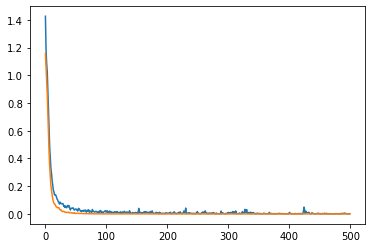

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show